In [80]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
from math import log, e
import math
from sklearn.utils import shuffle
import os
import pickle
from scipy.stats import iqr

In [81]:
df = pd.read_csv('../Data/data_4/poker-hand-training-true.data',header=None)
len(df)


25010

In [82]:
df.head(10)


,0,1,2,3,4,5,6,7,8,9,10
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
5,1,2,1,4,1,5,1,3,1,6,8
6,1,9,1,12,1,10,1,11,1,13,8
7,2,1,2,2,2,3,2,4,2,5,8
8,3,5,3,6,3,9,3,7,3,8,8
9,4,1,4,4,4,2,4,3,4,5,8


In [83]:
df.groupby(by=[10]).size()


10
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
dtype: int64

In [84]:
for i in range(0,11):
    vals = set(list(df[i]))
    print(len(vals), df[i].dtype)
  
    
    

4 int64
13 int64
4 int64
13 int64
4 int64
13 int64
4 int64
13 int64
4 int64
13 int64
10 int64


In [85]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
5,1,2,1,4,1,5,1,3,1,6,8
6,1,9,1,12,1,10,1,11,1,13,8
7,2,1,2,2,2,3,2,4,2,5,8
8,3,5,3,6,3,9,3,7,3,8,8
9,4,1,4,4,4,2,4,3,4,5,8


In [86]:
df = df.rename(columns = {10:'tag'})

In [87]:
for i in set(df['tag']) :
    _list = list(df['tag'])
    c = _list.count(i)
    print('Class :', i,'| count :',c )

Class : 0 | count : 12493
Class : 1 | count : 10599
Class : 2 | count : 1206
Class : 3 | count : 513
Class : 4 | count : 93
Class : 5 | count : 54
Class : 6 | count : 36
Class : 7 | count : 6
Class : 8 | count : 5
Class : 9 | count : 5


## Add in id


In [88]:
# add in id
new_col = list(range(1,len(df)+1))
df.insert(
    loc=0, 
    column='id', 
    value=new_col
)


In [89]:
normal_class_1 = 0
normal_class_2 = 1
anomaly_class = None
normal_class = [0,1]
anomaly_class = [9,8,7,6,5,4]

In [90]:
# there are multiple classes 
# taking the majority class as not_recom 
# anomaly : very_recom


normal_df = pd.DataFrame(df[df['tag'].isin(normal_class)],copy=True).sample(10000)
len(normal_df)

10000

In [91]:
# get anomalies
anomalies_df = pd.DataFrame(df[df['tag'].isin(anomaly_class)],copy=True)
len(anomalies_df)

199

In [92]:
len(anomalies_df)


199

In [93]:
data_df = pd.DataFrame(normal_df,copy=True)
data_df = data_df.append(anomalies_df,ignore_index=True)

In [94]:

data_df = shuffle(data_df)

In [95]:
len(data_df)

10199

In [96]:
l1 = len(data_df[data_df['tag'].isin(normal_class)])
l2 = len(data_df)
l1 = l2-l1
print('Percentage of Anomalies :',  (l1/l2)*100 )

Percentage of Anomalies : 1.9511716834983823


### Exploring the attributes


In [97]:
def entropy_calc(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.
    base = math.e 
    for i in probs:
        ent -= i * log(i, base)
    k = len(value)
    ent = ent/log(k,base)
    return ent

In [98]:
def get_entropies(df):
    # ignore 1st and last columns
    num_cols = len(df.columns)
    res = {}
    for i in range(1,num_cols-2):
        e = entropy_calc(list(df[i]))
        print(i,e)
        res[i] = e
    return res

In [99]:
attr_entropy = get_entropies(data_df)


1 0.9998895321489506
2 0.9999871340998523
3 0.9998670077090503
4 0.9999415709234303
5 0.9997778168648002
6 0.9998886385528682
7 0.9998445185890779
8 0.9998498860740865
9 0.9997583109228178


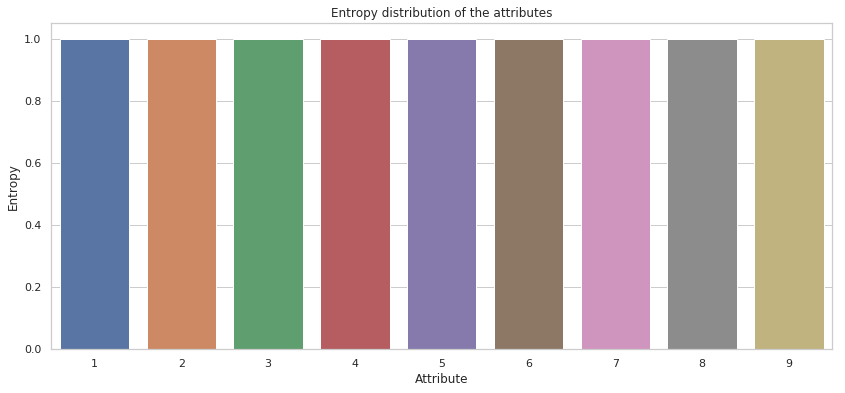

In [100]:
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(attr_entropy.keys()), y=list(attr_entropy.values()))
plt.xlabel('Attribute')
plt.ylabel('Entropy')
plt.title('Entropy distribution of the attributes')
plt.show()

## Filter attributes by threshold
### lb =0.05
### ub =0.95


In [101]:

lb = 0.0000000005
ub = 0.9999999999
attr_list = []
for k,v in attr_entropy.items():
    if v > 0 and v < 1:
        attr_list.append(k)
        

In [102]:
len(attr_list)

9

In [103]:
valid_attr = ['id']
valid_attr.extend(attr_list)
valid_attr.append('tag')
data_df = data_df[valid_attr]

## Explore Arity of the domains

In [104]:
def get_domain_arity(df,attr_list):
    domain_arity = {a: len(set(df[a])) for a in attr_list}
    return domain_arity

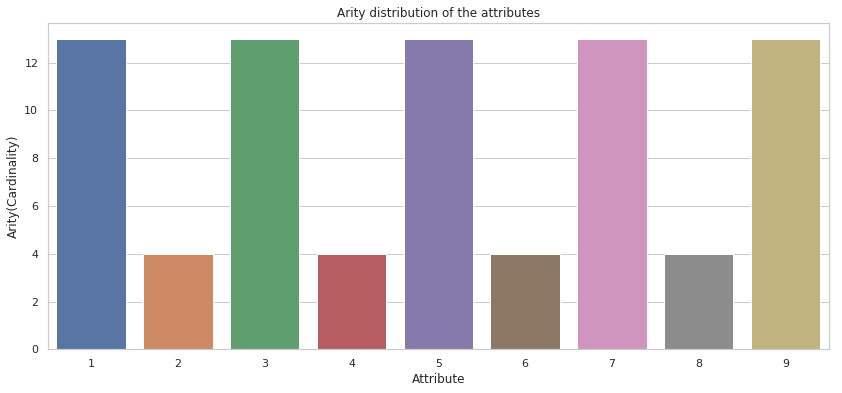

In [105]:

domain_arity = get_domain_arity(data_df,attr_list)
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(domain_arity.keys()), y=list(domain_arity.values()))
plt.xlabel('Attribute')
plt.ylabel('Arity(Cardinality)')
plt.title('Arity distribution of the attributes')
plt.show()  

In [106]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]


def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}

    for col in cols:

        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}

        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[col] = len(id2val_dict)

    domain_dims = []
    domain_dims_res = {}

    for col in list(df.columns):
        if col in domain_dims_dict.keys():
            print(col)
            domain_dims_res[col] = domain_dims_dict[col]
            domain_dims.append(domain_dims_dict[col])

    domain_dims =  np.array(domain_dims)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [107]:
# Save the data ina numpy array
_tmp = data_df[data_df['tag'].isin(normal_class)]
_normal = list(_tmp['id'])


_tmp = data_df[(data_df['tag'].isin(anomaly_class))]
_anomaly =  list(_tmp['id'])


all_ids = list(data_df['id'])
record_id_dict ={
    'all':all_ids,
    'normal':_normal,
    'anomaly':_anomaly
}

In [108]:
save_dir = '../Data/data_4'

data_df_1 = pd.DataFrame(data_df,copy=True)
try:
    del data_df_1['id']
    del data_df_1['tag']
except:
    pass

# convert all values to int
for c in list(data_df_1.columns):
    data_df_1[c] = data_df_1[c].astype(str)  
cols = list(data_df_1.columns)
data_df_1 = convert_to_ids(data_df_1, cols , save_dir)
data_x = data_df_1.values
    

1
2
3
4
5
6
7
8
9


In [111]:
OP_PATH = '../Data/data_4'
data_x_file = 'data_4_x.pkl'
record_file = 'data_4_idList.pkl'

f_path_1 = os.path.join(OP_PATH,data_x_file)
f_path_2 = os.path.join(OP_PATH,record_file)

with open(f_path_1,'wb') as fh :
    pickle.dump(data_x, fh,pickle.HIGHEST_PROTOCOL)
    
with open(f_path_2,'wb') as fh :
    pickle.dump(record_id_dict, fh,pickle.HIGHEST_PROTOCOL)